### 1. Importar Librerias

In [1]:
import os 
import pickle
import numpy as np
import tensorflow as tf
from functions.main import *
from matplotlib import pyplot as plt
from functions.topo_functions import *
from functions.main_attention import *
from sklearn.metrics import accuracy_score

### 2. Prueba con datos sinteticos (Modo Deep)

(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


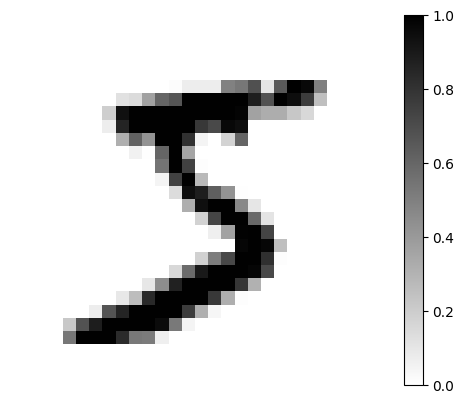

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Crear conjunto de entrenamiento y evaluacion
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]
# Normalizar imagenes 
X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape, X_valid.shape, X_test.shape)
plt.figure()
plt.imshow(X_train[0,:,:], cmap="binary", interpolation="nearest")
plt.axis('off')
plt.colorbar()
plt.show() 

Epoch 1/130
Epoch 2/130
Epoch 3/130
Epoch 4/130
Epoch 5/130
Epoch 6/130
Epoch 7/130
Epoch 8/130
Epoch 9/130
Epoch 10/130
Epoch 11/130
Epoch 12/130
Epoch 13/130
Epoch 14/130
Epoch 15/130
Epoch 16/130
Epoch 17/130
Epoch 18/130
Epoch 19/130
Epoch 20/130
Epoch 21/130
Epoch 22/130
Epoch 23/130
Epoch 24/130
Epoch 25/130
Epoch 26/130
Epoch 27/130
Epoch 28/130
Epoch 29/130
Epoch 30/130
Epoch 31/130
Epoch 32/130
Epoch 33/130
Epoch 34/130
Epoch 35/130
Epoch 36/130
Epoch 37/130
Epoch 38/130
Epoch 39/130
Epoch 40/130
Epoch 41/130
Epoch 42/130
Epoch 43/130
Epoch 44/130
Epoch 45/130
Epoch 46/130
Epoch 47/130
Epoch 48/130
Epoch 49/130
Epoch 50/130
Epoch 51/130
Epoch 52/130
Epoch 53/130
Epoch 54/130
Epoch 55/130
Epoch 56/130
Epoch 57/130
Epoch 58/130
Epoch 59/130
Epoch 60/130
Epoch 61/130
Epoch 62/130
Epoch 63/130
Epoch 64/130
Epoch 65/130
Epoch 66/130
Epoch 67/130
Epoch 68/130
Epoch 69/130
Epoch 70/130
Epoch 71/130
Epoch 72/130
Epoch 73/130
Epoch 74/130
Epoch 75/130
Epoch 76/130
Epoch 77/130
Epoch 78

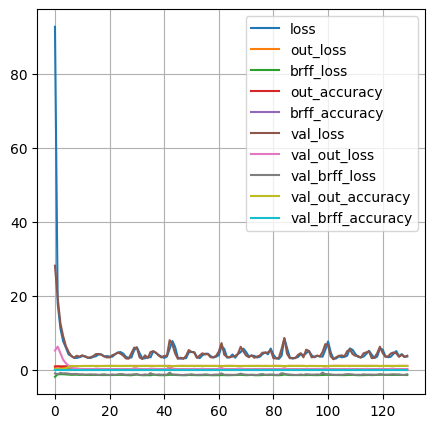

CNNrITL(batch_size=64, epochs=130, k=10, lk=1, n_fil=16, wi=False)

In [3]:
P = CNNrITL( d=2,  k=10, n_fil=16, epochs=130, 
            batch_size=64, lr=1e-3, sl='ritl', lk=1, l1=1e-3, wi=False)
P.fit(X_train, y_train)

In [4]:
y_pred  = P.predict(X_test)
print(f'El accuracy para el conjunto de evaluacion es: {accuracy_score(y_pred, y_test):.2f}')
X_new   = X_test[:5] # pretend we have new images
y_pred  = P.predict(X_new)
print(f'\nAnalizando 5 valores del conjunto de evaluacion: {y_test[:5]}')
print(f'Evaluando los 5 valores en la red entrenada: {y_pred.round(2)}')

El accuracy para el conjunto de evaluacion es: 0.96

Analizando 5 valores del conjunto de evaluacion: [7 2 1 0 4]
Evaluando los 5 valores en la red entrenada: [7 2 1 0 4]


### 3. Prueba con base de datos GIGA (modo Wide)

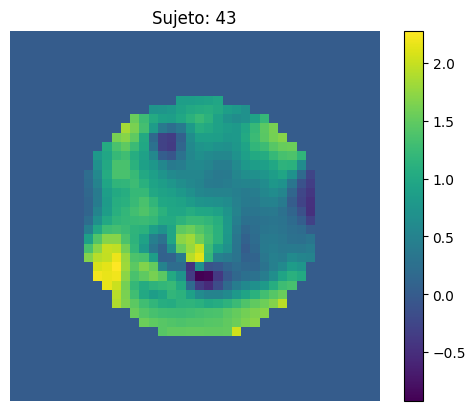

In [5]:
sbj           = 43                              # Sujeto
n_fb          = 2                               # 0 --> 8-12Hz, 1--->12-30Hz bandas de frecuencia
Ntw           = 5                               # Ventanas de tiempo

# Cargar datos a lo largo de las ventanas de tiempo y bandas de frecuencia
th_name  = np.array([[-1.5, 0.5], [-0.5, 1.5], [0.5, 2.5], [1.5, 3.5], [2.5, 4.5]]) # Ventanas de tiempo consideradas
XF_train_cwt = []
XF_train_csp = []
XF_test_cwt  = []
XF_test_csp  = []
for i in range(th_name.shape[0]):
  X_train_re_cwt, X_train_re_csp, X_test_re_cwt, X_test_re_csp, y_trainF, y_testF = TW_data(sbj, th_name[i,0], th_name[i,1])
  XF_train_cwt.append(X_train_re_cwt)
  XF_train_csp.append(X_train_re_csp)
  XF_test_cwt.append(X_test_re_cwt)
  XF_test_csp.append(X_test_re_csp)
# Crear conjunto de entrenamiento y evaluacion
XT_train, XT_test, y_train, y_test = norm_data(XF_train_cwt, XF_train_csp, XF_test_cwt, XF_test_csp, n_fb, Ntw, y_trainF, y_testF, 1)
# Mostrar Topoplot
X_train = np.moveaxis(np.array(XT_train), 0, 4)
X_test = np.moveaxis(np.array(XT_test), 0, 4)
print()
plt.figure()
plt.imshow(X_train[0,:,:,0,1])
plt.axis('off')
plt.title('Sujeto: '+str(sbj))
plt.colorbar()
plt.show()

(180, 40, 40, 1, 20)
Epoch 1/130
Epoch 2/130
Epoch 3/130
Epoch 4/130
Epoch 5/130
Epoch 6/130
Epoch 7/130
Epoch 8/130
Epoch 9/130
Epoch 10/130
Epoch 11/130
Epoch 12/130
Epoch 13/130
Epoch 14/130
Epoch 15/130
Epoch 16/130
Epoch 17/130
Epoch 18/130
Epoch 19/130
Epoch 20/130
Epoch 21/130
Epoch 22/130
Epoch 23/130
Epoch 24/130
Epoch 25/130
Epoch 26/130
Epoch 27/130
Epoch 28/130
Epoch 29/130
Epoch 30/130
Epoch 31/130
Epoch 32/130
Epoch 33/130
Epoch 34/130
Epoch 35/130
Epoch 36/130
Epoch 37/130
Epoch 38/130
Epoch 39/130
Epoch 40/130
Epoch 41/130
Epoch 42/130
Epoch 43/130
Epoch 44/130
Epoch 45/130
Epoch 46/130
Epoch 47/130
Epoch 48/130
Epoch 49/130
Epoch 50/130
Epoch 51/130
Epoch 52/130
Epoch 53/130
Epoch 54/130
Epoch 55/130
Epoch 56/130
Epoch 57/130
Epoch 58/130
Epoch 59/130
Epoch 60/130
Epoch 61/130
Epoch 62/130
Epoch 63/130
Epoch 64/130
Epoch 65/130
Epoch 66/130
Epoch 67/130
Epoch 68/130
Epoch 69/130
Epoch 70/130
Epoch 71/130
Epoch 72/130
Epoch 73/130
Epoch 74/130
Epoch 75/130
Epoch 76/130


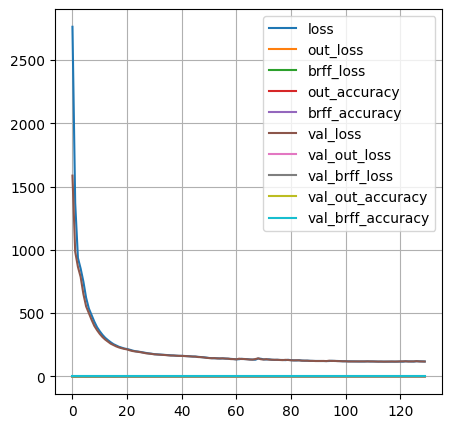

CNNrITL(batch_size=64, epochs=130, l1=0.01, lk=0.75, n_fil=16)

In [17]:
P = CNNrITL( d=2,  k=len(np.unique(y_train)), n_fil=16, epochs=130, 
            batch_size=64, lr=1e-3, sl='ritl', lk=0.75, l1=1e-2)
P.fit(X_train, y_train)

In [19]:
y_pred  = P.predict(X_test)
print(f'El accuracy para el conjunto de evaluacion es: {accuracy_score(y_pred, y_test):.2f}')
X_new   = X_test[:5] # pretend we have new images
y_pred  = P.predict(X_new)
print(f'\nAnalizando 5 valores del conjunto de evaluacion: {y_test[:5]}')
print(f'Evaluando los 5 valores en la red entrenada: {y_pred.round(2)}')

El accuracy para el conjunto de evaluacion es: 0.95

Analizando 5 valores del conjunto de evaluacion: [0. 1. 1. 0. 1.]
Evaluando los 5 valores en la red entrenada: [0 1 0 0 1]


- Estructura visual de la red en modo Wide

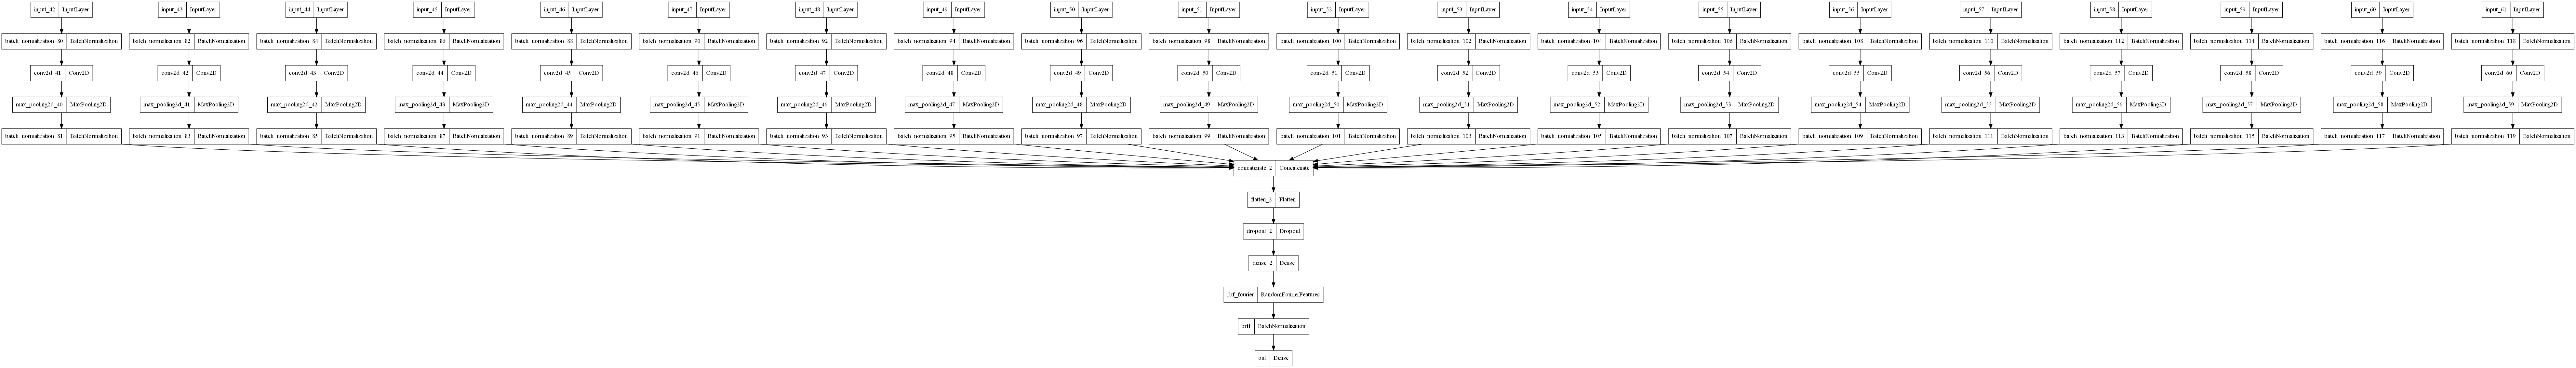

In [22]:
tf.keras.utils.plot_model(P.model)

In [32]:
P.model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_42 (InputLayer)          [(None, 40, 40, 1)]  0           []                               
                                                                                                  
 input_43 (InputLayer)          [(None, 40, 40, 1)]  0           []                               
                                                                                                  
 input_44 (InputLayer)          [(None, 40, 40, 1)]  0           []                               
                                                                                                  
 input_45 (InputLayer)          [(None, 40, 40, 1)]  0           []                               
                                                                                            

- Guardar modelo para la siguiente seccion

In [43]:
P.model.save(os.path.join('data','ITL_model.h5'))

### 3. Cargar modelo

- Notese que para cargar el modelo guardado es necesario definir las capas RFF y la de la funcion de costo diseñada.

In [3]:
P = CNNrITL()
model = tf.keras.models.load_model(os.path.join('data','ITL_model.h5'), 
                                   custom_objects={'RandomFourierFeatures':tf.keras.layers.experimental.RandomFourierFeatures,
                                   'custom_kitl':P.custom_ritl})

In [6]:
# Es necesario ajustar los datos debido a la entrada definida en la red
new_input = []
for i in range(X_test.shape[-1]):
    new_input.append(X_test[:,:,:,:,i])
# hacer el mismo ejercicio con los datos ajustados
y_pred  = model.predict(new_input)
# Notese que la funcion predict debe ser ajustada, pero el resultado muestra que el modelo fue cargado exitosamente
print(f'El accuracy para el conjunto de evaluacion es: {accuracy_score(np.argmax(y_pred[0], axis=1), y_test):.2f}')

1/1 [==============================] - 0s 359ms/step
El accuracy para el conjunto de evaluacion es: 0.95


## 4. Attention maps

- Capas convolucionales

Saliency class 0 layer 
Saliency class 1 layer 


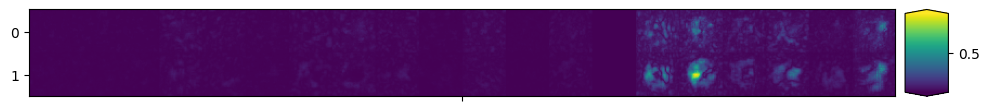

Gradcam++ class 0 layer conv2d_41
Gradcam++ class 0 layer conv2d_42
Gradcam++ class 0 layer conv2d_43
Gradcam++ class 0 layer conv2d_44
Gradcam++ class 0 layer conv2d_45
Gradcam++ class 0 layer conv2d_46
Gradcam++ class 0 layer conv2d_47
Gradcam++ class 0 layer conv2d_48
Gradcam++ class 0 layer conv2d_49
Gradcam++ class 0 layer conv2d_50
Gradcam++ class 0 layer conv2d_51
Gradcam++ class 0 layer conv2d_52
Gradcam++ class 0 layer conv2d_53
Gradcam++ class 0 layer conv2d_54
Gradcam++ class 0 layer conv2d_55
Gradcam++ class 0 layer conv2d_56
Gradcam++ class 0 layer conv2d_57
Gradcam++ class 0 layer conv2d_58
Gradcam++ class 0 layer conv2d_59
Gradcam++ class 0 layer conv2d_60
Gradcam++ class 1 layer conv2d_41
Gradcam++ class 1 layer conv2d_42
Gradcam++ class 1 layer conv2d_43
Gradcam++ class 1 layer conv2d_44
Gradcam++ class 1 layer conv2d_45
Gradcam++ class 1 layer conv2d_46
Gradcam++ class 1 layer conv2d_47
Gradcam++ class 1 layer conv2d_48
Gradcam++ class 1 layer conv2d_49
Gradcam++ clas

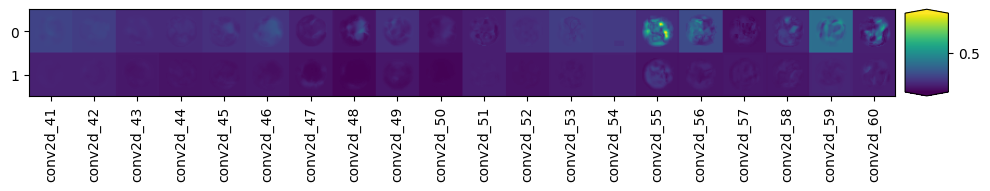

Scorecam class 0 layer conv2d_41
5/5 [==============================] - 0s 82ms/step
Scorecam class 0 layer conv2d_42
5/5 [==============================] - 0s 78ms/step
Scorecam class 0 layer conv2d_43
5/5 [==============================] - 0s 91ms/step
Scorecam class 0 layer conv2d_44
5/5 [==============================] - 0s 89ms/step
Scorecam class 0 layer conv2d_45
5/5 [==============================] - 1s 106ms/step
Scorecam class 0 layer conv2d_46
5/5 [==============================] - 0s 84ms/step
Scorecam class 0 layer conv2d_47
5/5 [==============================] - 0s 80ms/step
Scorecam class 0 layer conv2d_48
5/5 [==============================] - 0s 83ms/step
Scorecam class 0 layer conv2d_49
5/5 [==============================] - 1s 106ms/step
Scorecam class 0 layer conv2d_50
5/5 [==============================] - 0s 81ms/step
Scorecam class 0 layer conv2d_51
5/5 [==============================] - 0s 86ms/step
Scorecam class 0 layer conv2d_52
5/5 [=========================

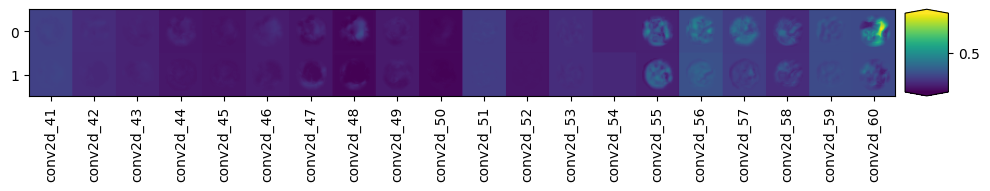

In [7]:
rel_model_name = ['Saliency','Gradcam++','Scorecam']# Indicar el o los mapas de atencion
layer_name = ['conv2d_41','conv2d_42','conv2d_43','conv2d_44','conv2d_45','conv2d_46','conv2d_47','conv2d_48','conv2d_49',
            'conv2d_50','conv2d_51','conv2d_52','conv2d_53','conv2d_54','conv2d_55','conv2d_56','conv2d_57','conv2d_58',
            'conv2d_59','conv2d_60']
relM_ = [None]*len(rel_model_name) #relM[m] -> numero de clases x resolucion de la imagen x el numero de capas
tmpr_ = [None]*len(rel_model_name) 

# Notese que las etiquetas se ponen en formato de entero y la entrada debe de ser ajsutada
for m in range(len(rel_model_name)):
    relM_[m],tmpr_[m] = attention_wide(model, rel_model_name[m], layer_name, new_input, y_test.astype(int),
                                     norm_c=False, norm_max_min=False, plot_int=False, transpose=True)

- Capa RFF

Saliency class 0 layer 
Saliency class 1 layer 


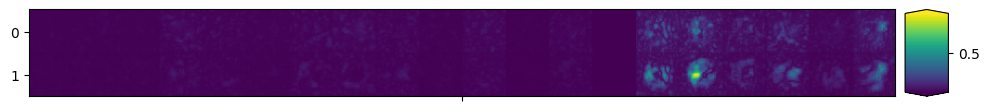

Gradcam++ class 0 layer rbf_fourier
Gradcam++ class 1 layer rbf_fourier


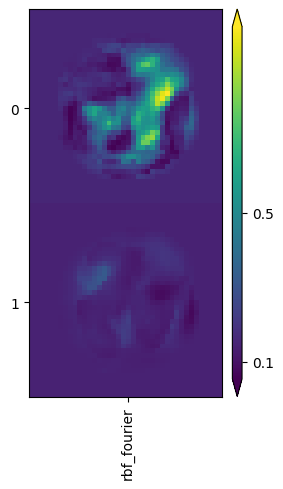

Scorecam class 0 layer rbf_fourier
5/5 [==============================] - 0s 95ms/step
Scorecam class 1 layer rbf_fourier
5/5 [==============================] - 1s 102ms/step


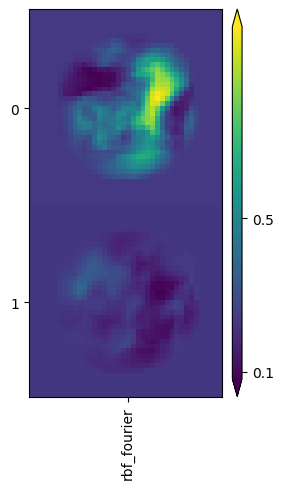

In [8]:
rel_model_name = ['Saliency','Gradcam++','Scorecam']# Indicar el o los mapas de atencion
layer_name = ['rbf_fourier']
relM_ = [None]*len(rel_model_name) #relM[m] -> numero de clases x resolucion de la imagen x el numero de capas
tmpr_ = [None]*len(rel_model_name) 

# Notese que las etiquetas se ponen en formato de entero y la entrada debe de ser ajsutada
for m in range(len(rel_model_name)):
    relM_[m],tmpr_[m] = attention_wide(model, rel_model_name[m], layer_name, new_input, y_test.astype(int),
                                     norm_c=False, norm_max_min=False, plot_int=False, transpose=True)